In [1]:
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
import numpy as np
import torch

from classvdd.train import TrainerClasSVDD
from classvdd.test import eval
from preprocess import get_ALeRCE_data

In [2]:
class Args:
    num_epochs=1000
    patience=100
    lr=1e-6
    weight_decay= 0.5e-2
    lr_milestones=[150, 300, 450, 600]
    batch_size=128
    pretrain=True
    latent_dim=32   
    
args = Args()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataloader_train, scaler, classes = get_ALeRCE_data(args.batch_size, 'train', mode='train')
dataloader_val, _, _ = get_ALeRCE_data(args.batch_size, 'val', mode='test', scaler=scaler)
dataloader_test, _, _ = get_ALeRCE_data(args.batch_size, 'test', mode='test', scaler=scaler)

classvdd = TrainerClasSVDD(args, dataloader_train, dataloader_val, device, scaler)
classvdd.train()

27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 0, Loss: 0.169
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 0, Loss: 0.184
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 1, Loss: 0.154
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 1, Loss: 0.175
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 2, Loss: 0.141
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 2, Loss: 0.165
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 3, Loss: 0.129
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 3, Loss: 0.155
Weights saved.
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 4, Loss: 0.119
4741/4741: [======================

27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 38, Loss: 0.026
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 38, Loss: 0.0785
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 39, Loss: 0.025
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 39, Loss: 0.0812
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 40, Loss: 0.025
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 40, Loss: 0.0818
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 41, Loss: 0.024
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 41, Loss: 0.081
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 42, Loss: 0.024
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch

27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 78, Loss: 0.018
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 78, Loss: 0.0858
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 79, Loss: 0.018
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 79, Loss: 0.0894
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 80, Loss: 0.018
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 80, Loss: 0.0897
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 81, Loss: 0.018
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 81, Loss: 0.0887
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 82, Loss: 0.018
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoc

27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 118, Loss: 0.016
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 118, Loss: 0.0917
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 119, Loss: 0.015
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 119, Loss: 0.092
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 120, Loss: 0.015
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 120, Loss: 0.0928
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 121, Loss: 0.015
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD... Epoch: 121, Loss: 0.0939
27058/27058: [===============================>] - ETA 0.0s
Training ClasSVDD... Epoch: 122, Loss: 0.015
4741/4741: [===============================>] - ETA 0.0s
Testing ClasSVDD

In [3]:
labels1, labels2, scores = eval(classvdd.net, classvdd.c, dataloader_test, device)

Testing...
ROC AUC score: 0.809


In [4]:
scores_in = scores[labels1==0]
scores_out = scores[labels1==1]

scores_ELL = scores[labels2==1]
scores_TDE = scores[labels2==2]
scores_SNIIb = scores[labels2==3]
scores_WRayot = scores[labels2==4]

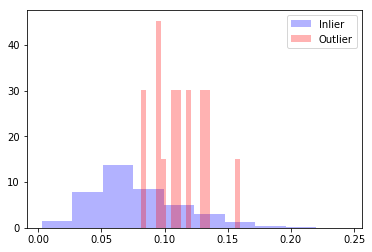

In [5]:
plt.hist(scores_in[scores_in<20], bins=10, color='b', alpha=0.3, density=True, label='Inlier')
plt.hist(scores_out, bins=20, color='r', alpha=0.3, density=True, label='Outlier')
plt.legend()